<a href="https://colab.research.google.com/github/darioblandon/Curso1/blob/main/S4/Repaso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado de Análisis de datos y Machine Learning en Python</h1>


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

<p><a name="contents"></a></p>

# Repaso y Ejemplos

- <a href="#misdat">1. Procesamiento de datos nulos </a><br>
 - <a href="#ignorarFila">1.1  Ignorar fila de datos</a><br>
 - <a href="#valVec">1.2 Llenado con valores vecinos</a><br>
 - <a href="#valSKL">1.3 Llenado de datos usando sklearn</a><br>
 - <a href="#valMod">1.4 Llenado con modelado</a><br>
- <a href="#example"> Ejemplo de preprocesado de datos</a><br>




<p><a name="misdat"></a></p>

# 1. Procesamiento de datos nulos 

[[Contenidos]](#contents)

El dataset adult.csv fue extraído por Barry Becke de la base de datos de Censos de  1994. Contiene tanto variables numéricas como categóricas. La información de las variables y su contenido se presentan a continuación:

age: continuo \\
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. \\
fnlwgt: continuo. \\
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. \\
education-num: continuo. \\
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. \\
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. \\
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. \\
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. \\
sex: Female, Male. \\
capital-gain: continuo. \\
capital-loss: continuo. \\
hours-per-week: continuo. \\
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s04/adult.csv') 

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


Encontrar el número de valores faltantes por columna

In [ ]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capitalgain          0
capitalloss          0
hoursperweek         0
native-country     857
class                0
dtype: int64

In [ ]:
# Porcentaje de información faltante
df.isnull().sum()/len(df)*100

age               0.000000
workclass         5.730724
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capitalgain       0.000000
capitalloss       0.000000
hoursperweek      0.000000
native-country    1.754637
class             0.000000
dtype: float64

Podemos decir que hay cinco metodologías principales para hacer el tratamiento de los datos nulos:
  
1.  Reemplazar con un valor constante
2. Reemplazar con un valor estadístico  (promedio, media, moda )
3. Ignorar la fila de datos
4.  Hacer un llenado hacia atrás (back-fill) o hacia adelante (forward-fill)
5. Llenado basado en modelos

Los dos primeros ya los cubrimos en la sesión anterior, así que enfoquemonos en los restantes.



<p><a name="ignorarFila"></a></p>

## 1.1 Ignorar fila de datos

El comando `dropna()` permite eliminar las filas y/o columnas en las que hayan datos faltantes

In [ ]:
df_filtered=df.dropna()

In [ ]:
print('Número de filas iniciales', len(df))
print('Número de filas después de filtrar', len(df_filtered))
print('Porcentaje de filas eliminadas',(1-len(df_filtered)/len(df))*100)

Número de filas iniciales 48842
Número de filas después de filtrar 45222
Porcentaje de filas eliminadas 7.411653904426519


In [ ]:
df_filtered.iloc[10:20,:]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
10,2,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,4,United-States,>50K
11,1,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,2,India,>50K
12,0,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,1,United-States,<=50K
13,1,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,3,United-States,<=50K
15,1,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,2,Mexico,<=50K
16,0,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,1,United-States,<=50K
17,1,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,2,United-States,<=50K
18,2,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,3,United-States,<=50K
19,2,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,2,United-States,>50K
20,2,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,>50K


Note que los índices no cambian. Lo que realiza es la eliminación de la fila (por ejemplo la 14 no está), pero mantiene la indexación. Por tanto, estos no coinciden con el número total de filas. Para reasignar los índices se puede hacer uso del comando `reset_index()`  

In [ ]:
df_filtered.reset_index(drop=True,inplace=True)

In [ ]:
df_filtered.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
45217,1,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,2,United-States,<=50K
45218,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K
45219,2,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,<=50K
45220,2,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,2,0,2,United-States,<=50K
45221,1,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,United-States,>50K


Se puede usar el argumento `subset` para seleccionar solo las columnas sobre las que se desea analizar si hay valores nulos para eliminar las filas 

In [ ]:
df.dropna(subset=['native-country'])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K
5,2,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,2,United-States,<=50K
6,3,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,0,Jamaica,<=50K
7,3,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,2,United-States,>50K
8,1,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,4,0,3,United-States,>50K
9,2,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,2,0,2,United-States,>50K


<p><a name="valVec"></a></p>

## 1.2 Llenado con valores vecinos

El comando `fillna()` tiene el argumento `method` que permite hacer un llenado hacia atrás ('bfill') o hacia adelante ('ffill').

Tenga en cuenta que al usar ésta opción si el dato con el que se intenta hacer el llenado también es un NaN, éste permanece.

In [ ]:
df.iloc[25:30,:]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
25,4,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,2,United-States,>50K
26,0,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,2,United-States,<=50K
27,3,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,3,South,>50K
28,2,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,4,United-States,<=50K
29,3,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,2,United-States,<=50K


In [ ]:
df.iloc[25:30,:].fillna(method='bfill')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
25,4,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,2,United-States,>50K
26,0,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,2,United-States,<=50K
27,3,Private,180211,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,3,South,>50K
28,2,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,4,United-States,<=50K
29,3,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,2,United-States,<=50K


In [ ]:
df.iloc[25:30,:].fillna(method='ffill')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
25,4,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,2,United-States,>50K
26,0,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,2,United-States,<=50K
27,3,Private,180211,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,3,South,>50K
28,2,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,4,United-States,<=50K
29,3,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,2,United-States,<=50K


<p><a name="example"></a></p>

# Ejemplo de preprocesado de datos

[[Contenidos]](#contents)

Trataremos un ejemplo de una base de datos de una tabla de características de marcas de carros.

De esta base de datos, pretendemos resolver el siguiente problema


**Cual es la tasa de consumo en Litros por cada 100 km para un carro diesel?**

## Importe de datos

Los datos en crudo se pueden encontrar en la dirrección  https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data.

**Importar panda y matplotlib.pyplot:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Lectura de los datos desde un url

In [ ]:
archivo = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

### Cabecera

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

### Carga de datos desde el url

Para esto usamos el método `read_csv()`

In [ ]:
df = pd.read_csv(archivo, names = headers)

### Inspección del archivo

Recordemos que podemos usar el método head()

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Podemos observar que muchas de las entradas están etiquetadas con el símbolo `?`. Esto corresponde datos faltantes que pueden dificultar un análisis ulterior.

Los pasos que debemos seguir a continuación son:



1.   Identificar los valores faltantes
2.   Tratar los valores faltantes.
3.   Corregir el formato de los datos.



## Identificación de valores faltantes y tratamiento.


### Conversión de `?` a `NaN`

Quienes llenaron esta tabla, identificaron los valores faltantes como `?`.  Por razones de tiempo de computo y conveniencia, replazaremos estos signos de interrogación por `NaN`, para lo cual debemos importantar antes la librería numéricas de python numpy. 

Para realizar el reemplazo usaremos el método `replace()`.

In [ ]:
import numpy as np

df.replace("?", np.nan, inplace = True) # No olvidarse de usar inplace.
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Identificación y conteo de valores faltantes:

Apliquemos el método `isnull()` y utilicemos la función de agregación `sum()`

In [ ]:
datos_faltantes = df.isnull().sum()
datos_faltantes

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

De acuerdo a la información anterior tenemos los siguientes datos faltantes.
<ol>
    <li>"normalized-losses": 41 </li>
    <li>"num-of-doors": 2 </li>
    <li>"bore": 4 </li>
    <li>"stroke" : 4 </li>
    <li>"horsepower": 2 </li>
    <li>"peak-rpm": 2 </li>
    <li>"price": 4 </li>
</ol>

## Tratamiento de los datos faltantes

<ol>
    <li>Eliminar el dato entero<br>
        a. Eliminar la fila entera<br>
        b. Eliminar la columna entera
    </li>
    <li>Reemplazar el dato<br>
        a. Reemplazar por la media<br>
        b. Reemplazar por la moda<br>
        c. Reemplazar basados en otra función
    </li>
</ol>

Solo debemos eliminar una columna si la mayoria de entradas son vacias. En nuestro caso, ninguna de las columnas cumplen con este criterio como para ser eliminadas. 

En este caso tenemos cierta libertad para aplicar diferences métodos de llenado de datos faltantes; no obstante, algunos métodos pueden resultar más adecuados que otros. Aplicaremos los siguientes métodos para cada columna:

<b>Reemplazo por la media:</b>
<ul>
    <li>"normalized-losses": 41 datos faltantes</li>
    <li>"stroke": 4 datos faltantes</li>
    <li>"bore": 4 datos faltantes</li>
    <li>"horsepower": 2 datos faltantes</li>
    <li>"peak-rpm": 2 datos faltantes</li>
</ul>

<b>Replace por la moda:</b>
<ul>
    <li>"num-of-doors": 2 dátos faltantes que serán reemplazados por "four". 
        <ul>
            <li>Razón: 84% de los sedan son 4 puertas. Dado que los carros cuatro puertas son los más frecuentes, la probabilidad de ocurrencia es mayor.</li>
        </ul>
    </li>
</ul>

<b>Eliminación de una fila entera:</b>
<ul>
    <li>"price": 4 datos faltantes
        <ul>
            <li>Razón: Como, eventualmente, el precio es algo que se puede predecir, ninguna entrada sin precio puede ser usada para una predicción; por ende, cualquier fila sin precio no será útil.</li>
        </ul>
    </li>
</ul>

### Cálculo del valor medio

In [ ]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Promedio de normalized-losses:", avg_norm_loss)

Promedio de normalized-losses: 122.0


Reemplazo de  "NaN" por el promedio en la columna "normalized-losses":

In [ ]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

Calculo del valor medio para la columna 'bore':

In [ ]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810957


Reemplazo de `NaN` por  el valor medio

In [ ]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

**Ejercicio: De acuerdo a lo anterior reemplace los valores faltantes de la columna stroke por su valor medio**

De doble click <b>aquí</b> para ver la solución:

<!-- The answer is below:

# Cálculo del valor medio:
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# Reemplazo de los valores faltantes por el valor medio
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

-->

Cálculo del valor medio de la columna 'horsepower' y reemplazo en los valores faltantes:

In [ ]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

Average horsepower: 104.25615763546799


Columna de 'peak-rpm':

In [ ]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Average peak rpm: 5125.369458128079


Para ver cuáles valores están presentes en una columna particular, podemos usar el método `value_counts()`:

In [ ]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

Vemos que los carros de cuatro puertas son los más comunes. También podemos usar el método `.idxmax()` para calcular el tipo más común automaticamente:

In [ ]:
df['num-of-doors'].value_counts().idxmax()

'four'

Reemplazamos en la columna 'num-of-doors' los valores vacios por la moda:

In [ ]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Finalmente, eliminemos todas las filas de carros sin precios:

In [ ]:
# Eliminación de columnas sin precio mediante dropna
df.dropna(subset=["price"], axis=0, inplace=True)

# Reinicio de los indices
df.reset_index(drop=True, inplace=True)

Apariencia de la tabla luego de preprocesarla

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Corrección de datos

<p>El último paso en el preprocesado de los datos consiste en revisar de que todos los datos estén en el formato adecuado(int, float, text u otro).</p>

Podemos usar en Pandas
<p><b>.dtypes()</b>  para ver el tipo</p>
<p><b>.astype()</b> para cambiar el tipo</p>

### Lista de tipos

In [ ]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p> Se puede observa que algunas columnas no tienen el tipo correcto.
  
  Las variables numéricas deben ser de tipo 'float' o 'int', y las variables con caracteres, como categorias, deben ser del tipo 'object'. Por ejemplo, 'bore' (diámetro del cilindro) y 'stroke' (ciclos/tiempos) son variables numéricas que describen el motor, esperamos entonces que sean de tipo 'float' o 'int'; no obstante, son de tipo 'object'. Debemos convertirlas a un tipo adecuado usantdo el método "astype()".</p> 

### Conversión al tipo adecuado:

In [ ]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [ ]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Hemos obtenido, finalmente, un conjunto de datos correcto, sin datos faltantes y en un formato correcto.

## Estandarización de datos

<p>
Los datos se recolectan, normalmente, de diferentes concesionarios, con diferentes formatos.
(La estandarización de datos se refiere también a un tipo particular de normalización, en donde se extrae el promedio y se divíde por la desviación estándar.)
</p>
    
<b>¿Qué es la estandarización?</b>
<p>La estandarización es el proceso de transformar unos datos en un formato común que permita a los investigadores realizar comparaciones significativas.
</p>

<b>Ejemplo</b>
<p>Transformar mpg (millas por galon) a L/100km (Litros por cada 100 km):</p>
<p>En el conjunto de datos, "city-mpg" y "highway-mpg" están representadas en unidades de mpg. En europa, por ejemplo, el consumo se da en L/100km </p>
<p>Debemos aplicar una <b>transformación de los datos</b> para pasar de  mpg a L/100km?</p>

<p>La conversión es<p>
L/100km = 235 / mpg
<p>Podemos aplicar en Pandas operaciones matemáticas directamente para lograr este fin.</p>

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [ ]:
# Conversión de mpg a L/100km
df['city-L/100km'] = 235/df["city-mpg"]

# Visualización de la operación
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


**Ejercicio:** De acuerdo con el procedimiento anterior, transforme mpg a L/100km en la columna de "highway-mpg", y cambie el nombre de la columna a highway-L/100km".

De doble click <b>aquí</b> para ver la solución.

<!-- 

# mpg a L/100km
df["highway-mpg"] = 235/df["highway-mpg"]

# renombre de "highway-mpg" a "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# visualización del conjunto de datos
df.head()

-->

## Normalización de los datos

<b>¿Por qué debemos aplica normalización?</b>
<p>La normalización es el proceso de transforma valores de varias variables a un rango similar. Normalmente, la normalización incluye un escalado de las varialbres de tal forma que el promedio sea 0 y la varianza 1, o escalar las variables de tal forma que el rango esté definido entre 0 y 1.
</p>

<b>Ejemplo</b>
<p>Supongamos que queremos rescalar las columnas "length", "width" and "height" </p>
<p><b>Objetivo:</b> Normalizar las variables a un rango de 0 a 1.</p>
<p><b>Métodología:</b> reemplazar el valor por (value original)/(valor máximo)</p>

In [ ]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

**Ejercicio:** Normalice la columna "heigh".

De doble click <b>aquí</b> para ver la solución.

<!--

df['height'] = df['height']/df['height'].max() 
# Mostrar las columnas normalizadas.
df[["length","width","height"]].head()

-->

Podemos observar como el rango queda definido entre 0 y 1

## Bineado de los datos

<b>Por qué binear?</b>
<p>
    Binear es el proceso que consiste en transformar una variable numérica continua en bines categoricos discretos, con el fin de realizar un analisis por grupos.
</p>

<b>Ejemplo: </b>
<p>En nuestra base de datos, "horsepower" es una variable real que varia desde 48 a 288, tiene 57 valores únicos. Que pasaría si quisieramos discriminar entre diferentes precios dependiendo de si se trata de un "horsepower" alto, medio o bajo? Podemos reorganizarlos en bines para un analisis más simple? </p>

<p>Usemos el método de pandas `cut` para partiro en tres bines: </p>

<p>Primero convirtamos "horsepower al formato correcto:" </p>

In [ ]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
dtype: object

In [ ]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Realicemos un histograma de esta variable para ver como están distribuida:

Text(0.5, 1.0, 'horsepower bins')

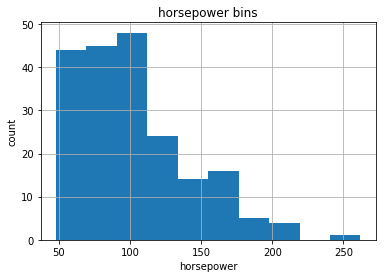

In [ ]:
import matplotlib as plt
df.horsepower.hist()
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p> Para establecer 3 bines de ancho igual, usamos la función de numpy <code>linspace(start_value, end_value, numbers_generated)</code> .</p>
<p>En estos casos tendríamos que</p>
 <p>start_value=min(df["horsepower"]).</p>
<p>end_value=max(df["horsepower"]).</p>
<p>Como queremos crea  3 bines del mismo ancho, usamos 4 como divisor /numbers_generated=4)</p>

In [ ]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Nombre de los grupos

In [ ]:
group_names = ['Low', 'Medium', 'High']

Aplicaciónde la función "cut"  para determinar que valor de "df['horsepower']" pertenece a qué categoría. 

In [ ]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Veamos las cuentas por cada bin:

In [ ]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Grafiquemos como están distribuidos por estas categorias la columna "horsepower"

Text(0.5, 1.0, 'horsepower bins')

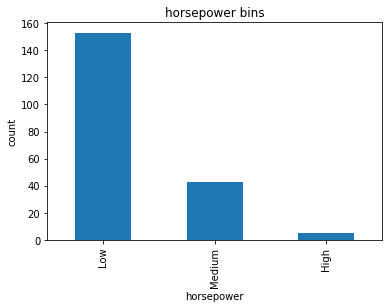

In [ ]:
import matplotlib as plt
df["horsepower-binned"].value_counts().plot(kind='bar')
# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

## Visualización de los bins

Normalmente,  un histograma se crea para ver la distribución de los bines que creamos arriba:

Text(0.5, 1.0, 'horsepower bins')

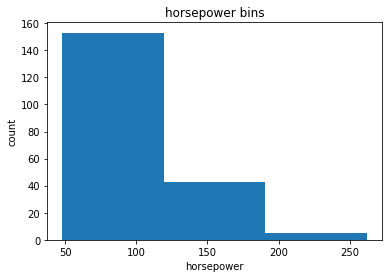

In [ ]:
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

En la gráfica anterior se muestra el resultado del bineado para el atributo "horsepower"